## В данной лабораторной работе решается следующая система:

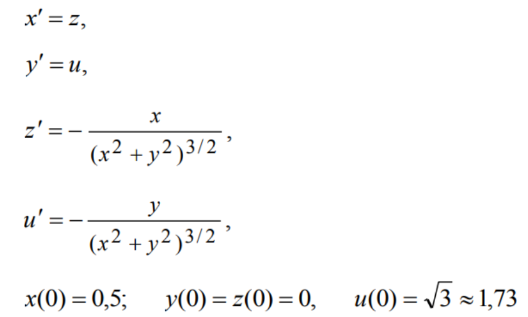

In [3]:
import numpy as np
from matplotlib import pyplot as plt


### Рассмотрим решение уравнения $\dfrac{dx}{dt} = f(x) $ методом Рунге-Кутты 4-го порядка:

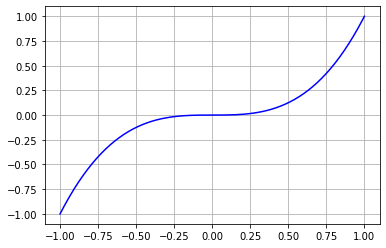

In [194]:
def fun(t,x):
    #f(x) = 3 t^2
    fun = 3*t**2
    return fun
    
# начальные условия
t = -1
x = -1
x_table, t_table = [-1], [-1]
# размер шага.
dt = 0.01

while (t < 1):
    # расчёт k_i.
    k1 = fun(t,      x)
    k2 = fun(t+dt/2, x+dt*k1/2)
    k3 = fun(t+dt/2, x+dt*k2/2)
    k4 = fun(t+dt,   x+dt*k3)
    # подсчёт следующего значения
    x = x + dt/6*(k1+2*k2+2*k3+k4)
    t = t + dt
    x_table.append(x)
    t_table.append(t)
plt.plot(t_table, x_table, 'b-', ms = 1)

plt.grid()
plt.show()

In [5]:
def makeplot(x, y, xlabel = "x", ylabel = "y", title = "y(x)", show = 1, grid = 1, label = 0):
    if label != 0:
        plt.plot(x, y, label = label, color = np.random.rand(3))
        plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
    else:
        plt.plot(x, y, color = np.random.rand(3))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    if grid:
        plt.grid()
    if show:
        plt.show()

#### Рассмотрим поставленную задачу следующим образом
$$ x'' = - \dfrac{x}{x^2 + y^2)^{3/2}}$$
$$ y'' = - \dfrac{y}{x^2 + y^2)^{3/2}}$$     
#### при заданных x, x', y, y', т.е нас интересует решение уравнения $$ \vec{x}'' = \vec{f} (\vec{x}) $$

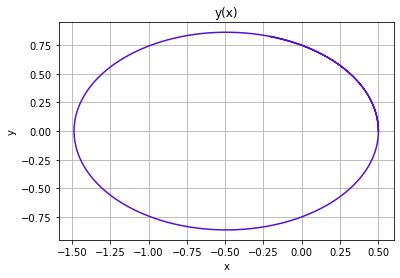

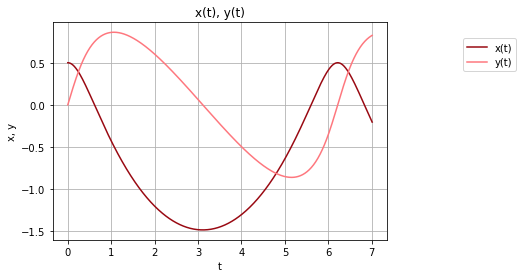

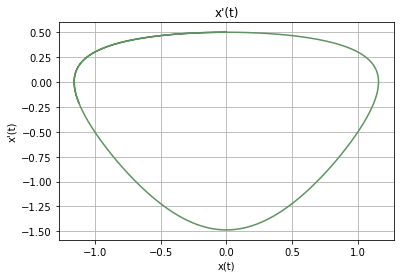

In [198]:
def fun_x(t, x, y):
    return -x/(x**2 + y**2)**(3/2)
def fun_y(t, x, y):
    return -y/(x**2 + y**2)**(3/2)
def derivs(t, x, y):
    derivs_x = np.array([x[1], fun_x(0, x[0], y[0])])
    derivs_y = np.array([y[1], fun_y(0, x[0], y[0])])
    return np.array([derivs_x, derivs_y])

#поставим начальные условия:
t = 0
x = np.array([0.5, 0]) #знач. в точке и 1-ая производная для y
y = np.array([0, 1.73]) #нач. условия на y (аналогично - вектор (x, v) )
dt = 0.01 # размер шага


x_table = np.array([x])
y_table = np.array([y])
t_table = [t]
while (t < 7):
    k1 = derivs(t, x, y)
    k2 = derivs(t+dt/2, x+dt*k1[0]/2, y+dt*k1[1]/2)
    k3 = derivs(t+dt/2, x+dt*k2[0]/2, y+dt*k2[1]/2)
    k4 = derivs(t+dt,   x+dt*k3[0], y+dt*k3[1])
    
    x = x + dt/6*(k1[0]+2*k2[0]+2*k3[0]+k4[0])
    y = y + dt/6*(k1[1]+2*k2[1]+2*k3[1]+k4[1])
    t = t + dt
    
    x_table = np.append(x_table, [x], axis = 0)
    y_table = np.append(y_table, [y], axis = 0)
    t_table.append(t)

x_table = x_table.transpose()
y_table = y_table.transpose()    
makeplot(x_table[0], y_table[0])
makeplot(t_table, x_table[0], "t", "x, y", "x(t), y(t)", show = 0, grid = 0, label = "x(t)") 
makeplot(t_table, y_table[0], "t", "x, y", "x(t), y(t)", label = "y(t)")
makeplot(x_table[1], x_table[0], "x(t)", "x'(t)", "x'(t)")

### Рассмотрим метод Адамса четвёртого порядка: $ y_{n+1} = y_n + h(\dfrac{55}{24} f(x_n, y_n) - \dfrac{59}{24} f(x_{n-1}, y_{n-1}) + \dfrac{37}{24} f(x_{n-2}, y_{n-2}) - \dfrac{3}{8} f(x_{n-3}, y_{n-3}))$

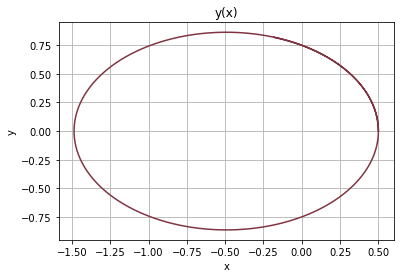

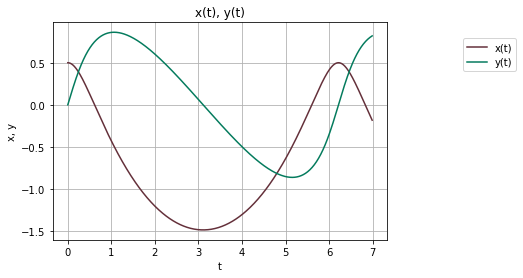

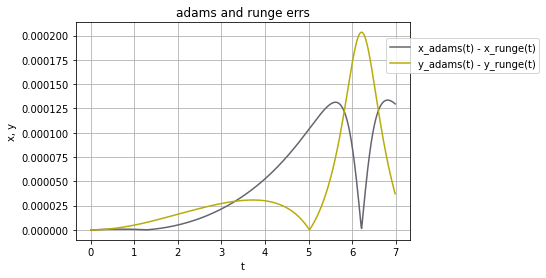

In [211]:
def fun_x(x, y):
    return -x/(x**2 + y**2)**(3/2)
def fun_y(x, y):
    return -y/(x**2 + y**2)**(3/2)

def adams(func, k):
    return 55/24*func(x_adams[k][i-1], y_adams[k][i-1]) \
            - 59/24*func(x_adams[k][i-2], y_adams[k][i-2]) \
            + 37/24*func(x_adams[k][i-3], y_adams[k][i-3])\
                - 3/8*func(x_adams[k][i-4], y_adams[k][i-4])

dt = 0.01 # размер шага

#возьмём первые 4 значения из метода Рунге-Кутты
t_table = np.arange(0, 7, dt)
x_adams = np.zeros((2, len(t_table)))
x_adams[0][0:4] = x_table[0][0:4]
x_adams[1][0:4] = x_table[1][0:4]
y_adams = np.zeros((2, len(t_table)))
y_adams[0][0:4] = y_table[0][0:4]
y_adams[1][0:4] = y_table[1][0:4]

for i in range(4, len(t_table)):
    x_adams[1][i] = x_adams[1][i-1] + dt*adams(fun_x, 0)
    y_adams[1][i] = y_adams[1][i-1] + dt*adams(fun_y, 0)
    
    x_adams[0][i] = x_adams[0][i-1] + dt*adams(func = lambda x,y: x, k = 1)
    y_adams[0][i] = y_adams[0][i-1] + dt*adams(func = lambda x,y: y, k = 1)
    
makeplot(x_adams[0], y_adams[0])
makeplot(t_table, x_adams[0], "t", "x, y", "x(t), y(t)", show = 0, grid = 0, label = "x(t)") 
makeplot(t_table, y_adams[0], "t", "x, y", "x(t), y(t)", label = "y(t)")
makeplot(t_table, abs(x_adams[0] - x_table[0][0:700]), "t", "x, y", "x'(t)", show = 0, grid = 0, label = "x_adams(t) - x_runge(t)")
makeplot(t_table, abs(y_adams[0] - y_table[0][0:700]), "t", "x, y", "adams and runge errs", label = "y_adams(t) - y_runge(t)")